In [57]:
#Loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
import datetime as datetime

In this assignment, we are investigating a portfolio consisting of three different stocks. We would like to find the return of the portfolio, and the variances that the portfolio entails. In the end we want to find the optimal portfolio weights for the maximum return.

In [58]:
#Defining start and end dates
start_date = datetime.datetime(2019,1,1)
end_date = datetime.datetime(2022,4,1)

#Assigning our assets to the symbols variable
ticker = ['AAPL','MSFT', 'TSLA']

In [59]:
#downloading ticker daily prices from yahoo finance and append it to dataframe
df = yf.download(ticker,start=start_date, end=end_date)
df = df['Adj Close'].pct_change()
df

[*********************100%***********************]  3 of 3 completed


,AAPL,MSFT,TSLA
Date,,,
2018-12-31,NaN,NaN,NaN
2019-01-02,0.001141,-0.004430,-0.068149
2019-01-03,-0.099607,-0.036788,-0.031472
2019-01-04,0.042689,0.046509,0.057697
2019-01-07,-0.002225,0.001275,0.054361
...,...,...,...
2022-03-25,0.003734,-0.001381,-0.003235
2022-03-28,0.005037,0.023117,0.080345
2022-03-29,0.019134,0.015159,0.007080


In [60]:
#Calculating percentage returns
returns = df['Adj Close'].pct_change()


KeyError: 'Adj Close'

In [4]:
#normalizing daily adjusted close prices with log. We just need the Adjusted Closing price for our return calculations. So selecting the column
df = np.log(1+ df['Adj Close'].pct_change())
df

,AAPL,MSFT,TSLA
Date,,,
2018-12-31,NaN,NaN,NaN
2019-01-02,0.001140,-0.004440,-0.070582
2019-01-03,-0.104924,-0.037482,-0.031978
2019-01-04,0.041803,0.045460,0.056094
2019-01-07,-0.002228,0.001274,0.052935
...,...,...,...
2022-03-25,0.003727,-0.001382,-0.003240
2022-03-28,0.005024,0.022853,0.077281
2022-03-29,0.018954,0.015046,0.007055


In [2]:
daily_cummulative_simple_return =(df+1).cumprod()
daily_cummulative_simple_return

NameError: name 'df' is not defined

The portfolio return is given as
$$\begin{equation} E(x)=w_1*\mu_1+w_2*\mu_2+...+w_n*\mu_n \end{equation}$$
where $w_n$ is the weight of the asset $n$ and $\mu_n$ is the mean return of asset $n$ 

In [56]:
#Calculating percentage returns
returns = df['Adj Close'].pct_change()
returns

# Calculating individual mean returns 
meanDailyReturns = returns.mean()

# Defining weights for the portfolio
weights = np.array([0.0, 0.0, 1.00])

# Calculate expected portfolio performance
pf_ret = np.sum(meanDailyReturns*weights)

# Print the portfolio return
pf_ret


#creating portfolio returns column
returns['Portfolio'] = returns.dot(weights)

returns

# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print (daily_cum_ret.tail())


KeyError: 'Adj Close'

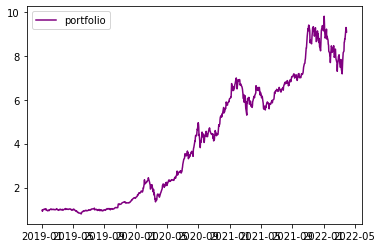

In [27]:
# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator
plt.legend()
plt.show()

In [39]:
#Choosing random weights for AAPL, MSFT TSLA
weights = [0.25,0.25,0.5]

#Portfolio return using formular
pf_return=weights[0]*df.AAPL.mean()+weights[1]*df.MSFT.mean()+weights[2]*df.TSLA.mean()

#Portfolio return using numpy
def pf_ret(weights):
    return np.dot(df.mean(),weights)


print('The daily return of the portfolio is ' + "%.5f" % pf_return + "%")
print('The daily return of the portfolio is ' + "%.5f" % pf_ret(weights) + "%")


AttributeError: 'DataFrame' object has no attribute 'AAPL'

The portfolio variance is given as
$$\begin{equation} Var(x)=w_1^2*\sigma_1^2+w_2^2*\sigma_2^2+w_3^2*\sigma_3^2+2*w_1*w_2*Cov_{1,2}+2*w_1*w_3*Cov_{1,3}+2*w_2*w_3*Cov_{2,3} \end{equation}$$
where $w$ is the weight of the asset, $\sigma$ is the standard deviation of the asset and $Cov_{x,y}$ is the covariance between asset $x,y$

In [55]:
#Daily percentage returns
daily_returns = df.pct_change()
#Finding the covariance
cov_matrix = returns.cov()
cov_matrix2 = (daily_returns.cov())*250

cov_matrix

pf_var = np.dot(weights.T, np.dot(cov_matrix, weights))


AttributeError: 'list' object has no attribute 'T'

In [51]:
#Variance for the portfolio using formular
pf_variance = weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+weights[2]**2*df.cov().iloc[2,2]+2*weights[0]*weights[1]*df.cov().iloc[0,1]+2*weights[0]*weights[2]*df.cov().iloc[0,2]+2*weights[1]*weights[2]*df.cov().iloc[1,2]

#Variance using numpy
pf_var= np.dot(np.dot(df.cov(), weights),weights)

#portfolio standard deviation
pf_standarddeviation=pf_variance**(1/2)*np.sqrt(250) #np.sqrt(250) is annualizing the standard deviations

#Defining a variable for portfolio standard deviation. the np.sqrt(250) is the annualized standard deviation
def pf_std(weights):
    return (np.dot(np.dot(df.cov(), weights),weights))**(1/2)*np.sqrt(250) #np.sqrt(250) is annualizing the standard deviations

print('The variance of the portfolio is ' + "%.6f" % pf_variance, 'and the portfolio standard variation is ' + "%.6f" % pf_standarddeviation + ' (Using formular)')
print('The variance of the portfolio is ' + "%.6f" % pf_var, 'and the portfolio standard variation is ' + "%.6f" % pf_std(weights) + ' (Using numpy)')

The variance of the portfolio is 0.000737 and the portfolio standard variation is 0.429240 (Using formular)
The variance of the portfolio is 0.000737 and the portfolio standard variation is 0.429240 (Using numpy)


Random portfolio weights for the efficient frontier

In [9]:
#Creating random weightcreator
def weightscreator(df):
    rand = np.random.random(len(df.columns)) #using len to take the column length of our dataframe - scalable if more stocks will be included
    rand /= rand.sum() #as the sum of the weights always should be 1
    return rand

weightscreator(df) #when executing this twice, new random weights will be given to our dataframe with n numbers of stocks

array([0.10147609, 0.00820661, 0.06298844, 0.1027285 , 0.07286527,
       0.09162976, 0.09720732, 0.01608433, 0.05040098, 0.02578135,
       0.01406257, 0.0891304 , 0.02769891, 0.0784472 , 0.02080053,
       0.08622377, 0.02963364, 0.02463432])

In [10]:
#Defining empty lists
returns =[]
stds = []
w = []

for i in range(500): #looping over 500 iterations
    weights =weightscreator(df) #getting 500 different weights
    returns.append(pf_ret(weights))
    stds.append(pf_std(weights))
    w.append(weights)


NameError: name 'pf_ret' is not defined

ValueError: min() arg is an empty sequence

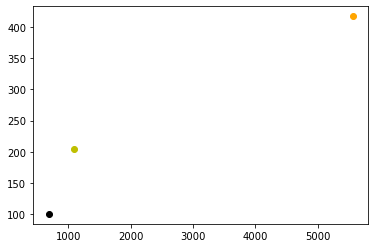

In [11]:
plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k') 
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='y')
plt.scatter(df.std().iloc[2]*np.sqrt(250),df.mean().iloc[2],c='orange')
plt.scatter(min(stds),returns[stds.index(min(stds))], c='green') #minimum variance portfolio
plt.title("Efficient frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")

In [12]:
returns[stds.index(min(stds))] #Return on portfolio given minimum variance


ValueError: min() arg is an empty sequence

In [13]:
w[stds.index(min(stds))] #Optimal portfolio weights in minimum variance portfolio. This makes intuitively sense, hence tesla has the lowest portfolio weight which can be explained by its very high volatility

ValueError: min() arg is an empty sequence